[2.5366466556099834, 2.529507210806547, 2.5215939366863225, 2.5131489200301647, 2.504353417502903, 2.4954339761796644, 2.486540251641458, 2.477854541496713, 2.469474206237585, 2.4615185548672267, 2.4540211557186784, 2.4470290935908108, 2.44050763148527, 2.434428834812521, 2.4286879432917114, 2.423181446510085, 2.4177310206552125, 2.412155708982542, 2.4061948084668314, 2.399585522224526, 2.3919696481689723, 2.3829980110886124, 2.3721955142459237, 2.359128394217129, 2.343185851951403, 2.323867749035576, 2.300415816487691, 2.272310289011845, 2.238646417840882, 2.19897153262794, 2.152249944029802, 2.0982301947251676, 2.035770154023556, 1.9650014313568518, 1.8846932508230627, 1.7955816816729626, 1.6963319315185488, 1.5885302534120171, 1.4706541765742245, 1.3453932496437935, 1.2108466060471734, 1.0795193646734347, 0.9478198222002501, 0.8194420848090683, 0.6903398768111697, 0.5641557563416474, 0.4371850272882636, 0.3122987391203641, 0.186856315521407, 0.06236504456600331]
2.261893008231321


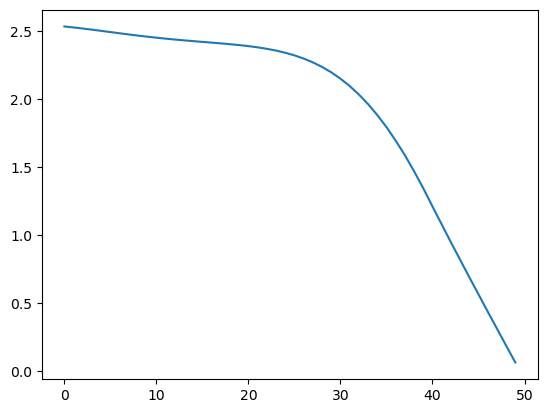

In [66]:
from matplotlib import pyplot as plt
import numpy as np

region1 = {'length':[0,40,40],'D':7,'microxs_abs':0.25,'vmicroxs_fis':0.65}
region2 = {'length':[40,50,10],'D':6,'microxs_abs':0.01,'vmicroxs_fis':0}

mesh_size=1
flux=[1 for _ in range(int(region1['length'][2]//mesh_size))]+[1 for _ in range(int(region2['length'][2]//mesh_size))]
cur = [0 for _ in range(int(region1['length'][2]//mesh_size))]+[0 for _ in range(int(region2['length'][2]//mesh_size-1))]
k=1
#s=[region1['vmicroxs_fis']*mesh_size/k for _ in range(int(region1['length'][2]//mesh_size))]+[region2['vmicroxs_fis']*mesh_size/k for _ in range(int(region2['length'][2]//mesh_size))]


for i in range(100):
    temp_flux=[]
    s=[region1['vmicroxs_fis']*flux[i1]*mesh_size/k for i1 in range(int(region1['length'][1]-region1['length'][0]//mesh_size))]+[region2['vmicroxs_fis']*flux[i1]*mesh_size/k for i1 in range(int(region2['length'][1]-region2['length'][0]//mesh_size))]
    for j in range(len(flux)):
        if j < region1['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region1['D']*flux[j+1])/(1*region1['D']+region1['microxs_abs']*mesh_size)
                temp_flux.append(temp)
            elif j == len(flux)-1:
                temp = (s[j]*mesh_size+region1['D']*flux[j-1])/(2*region1['D']+region1['microxs_abs']*mesh_size)
                temp_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region1['D']*flux[j+1]+region1['D']*flux[j-1])/(2*region1['D']+region1['microxs_abs']*mesh_size)
                temp_flux.append(temp)
        elif j < region2['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region2['D']*flux[j+1])/(2*region2['D']+region2['microxs_abs']*mesh_size)
                temp_flux.append(temp)
            elif j == len(flux)-1:
                D_15=2*region2['D']
                temp = (s[j]*mesh_size+region2['D']*flux[j-1])/(region2['D']+D_15+region2['microxs_abs']*mesh_size)
                temp_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region2['D']*flux[j+1]+region2['D']*flux[j-1])/(2*region2['D']+region2['microxs_abs']*mesh_size)
                temp_flux.append(temp)
    upper=sum([region1['vmicroxs_fis']*temp_flux[i1]*mesh_size for i1 in range(region1['length'][1])])+sum([region2['vmicroxs_fis']*temp_flux[i1]*mesh_size for i1 in range(region1['length'][1],region2['length'][1])])
    lower=sum([region1['vmicroxs_fis']*flux[i1]*mesh_size for i1 in range(region1['length'][1])])+sum([region2['vmicroxs_fis']*flux[i1]*mesh_size for i1 in range(region1['length'][1],region2['length'][1])])
    k=k*(upper/lower)
    flux=temp_flux
    
    
x = np.arange(len(flux))
y = flux
print(flux)
print(k)
plt.plot(x,y)
plt.show()




2.9471911157147943


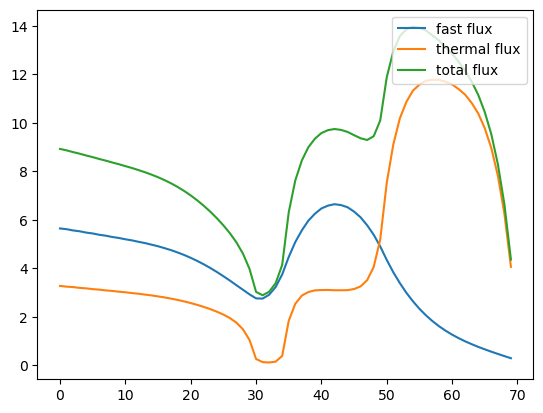

In [71]:
from matplotlib import pyplot as plt
import numpy as np

region1 = {'length':[0,30,30],'D1':1.4,'D2':0.2,'microxs_abs1':0.01,'microxs_abs2':0.1,'vmicroxs_fis1':0.005,'vmicroxs_fis2':0.14,'microxs_sca':0.06}
region2 = {'length':[30,35,5],'D1':1.1,'D2':0.12,'microxs_abs1':0.05,'microxs_abs2':0.5,'vmicroxs_fis1':0,'vmicroxs_fis2':0,'microxs_sca':0.01}
region3 = {'length':[35,50,15],'D1':1.4,'D2':0.2,'microxs_abs1':0.01,'microxs_abs2':0.1,'vmicroxs_fis1':0.009,'vmicroxs_fis2':0.24,'microxs_sca':0.06}
region4 = {'length':[50,70,20],'D1':1.23,'D2':0.16,'microxs_abs1':0.0006,'microxs_abs2':0.019,'vmicroxs_fis1':0,'vmicroxs_fis2':0,'microxs_sca':0.05}

mesh_size=1
fast_flux=[1 for _ in range(int(region4['length'][1]//mesh_size))]
thermal_flux=[1 for _ in range(int(region4['length'][1]//mesh_size))]

k=1

#s1=[(region1['vmicroxs_fis1']+region1['vmicroxs_fis2'])*mesh_size/k for _ in range(int(region1['length'][2]//mesh_size))]
#S2=[(region2['vmicroxs_fis1']+region2['vmicroxs_fis2'])*mesh_size/k for _ in range(int(region2['length'][2]//mesh_size))]
#s3=[(region3['vmicroxs_fis1']+region3['vmicroxs_fis2'])*mesh_size/k for _ in range(int(region3['length'][2]//mesh_size))]
#s4=[(region4['vmicroxs_fis1']+region4['vmicroxs_fis2'])*mesh_size/k for _ in range(int(region4['length'][2]//mesh_size))]
#s=s1+s2+s3+s4


for i in range(100):
    temp_fast_flux=[]
    s1=[(region1['vmicroxs_fis1']*fast_flux[i1]+region1['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region1['length'][1]-region1['length'][0])//mesh_size))]
    s2=[(region2['vmicroxs_fis1']*fast_flux[i1]+region2['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region2['length'][1]-region2['length'][0])//mesh_size))]
    s3=[(region3['vmicroxs_fis1']*fast_flux[i1]+region3['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region3['length'][1]-region3['length'][0])//mesh_size))]
    s4=[(region4['vmicroxs_fis1']*fast_flux[i1]+region4['vmicroxs_fis2']*thermal_flux[i1])*mesh_size/k for i1 in range(int((region4['length'][1]-region4['length'][0])//mesh_size))]
    s=s1+s2+s3+s4
    
    for j in range(len(fast_flux)):
        if j < region1['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region1['D1']*fast_flux[j+1])/(1*region1['D1']+region1['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            elif j == len(fast_flux)-1:
                temp = (s[j]*mesh_size+region1['D1']*fast_flux[j-1])/(2*region1['D1']+region1['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region1['D1']*fast_flux[j+1]+region1['D1']*fast_flux[j-1])/(2*region1['D1']+region1['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
        elif j < region2['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region2['D1']*fast_flux[j+1])/(1*region2['D1']+region2['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            elif j == len(fast_flux)-1:
                temp = (s[j]*mesh_size+region2['D1']*fast_flux[j-1])/(2*region2['D1']+region2['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region2['D1']*fast_flux[j+1]+region2['D1']*fast_flux[j-1])/(2*region2['D1']+region2['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
        elif j < region3['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region3['D1']*fast_flux[j+1])/(1*region3['D1']+region3['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            elif j == len(fast_flux)-1:
                temp = (s[j]*mesh_size+region3['D1']*fast_flux[j-1])/(2*region3['D1']+region3['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region3['D1']*fast_flux[j+1]+region3['D1']*fast_flux[j-1])/(2*region3['D1']+region3['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
        elif j < region4['length'][1]:
            if j == 0:
                temp = (s[j]*mesh_size+region4['D1']*fast_flux[j+1])/(1*region4['D1']+region4['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            elif j == len(fast_flux)-1:
                D_3o2=region4['D1']/(mesh_size+2*region4['D1'])
                temp = (s[j]*mesh_size+region4['D1']*fast_flux[j-1])/(region4['D1']+D_3o2+region4['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
            else:
                temp = (s[j]*mesh_size+region4['D1']*fast_flux[j+1]+region4['D1']*fast_flux[j-1])/(2*region4['D1']+region4['microxs_abs1']*mesh_size)
                temp_fast_flux.append(temp)
    
    s21=[region1['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region1['length'][1]-region1['length'][0])//mesh_size)]
    s22=[region2['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region2['length'][1]-region2['length'][0])//mesh_size)]
    s23=[region3['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region3['length'][1]-region3['length'][0])//mesh_size)]
    s24=[region4['microxs_sca']*fast_flux[i1]*mesh_size for i1 in range((region4['length'][1]-region4['length'][0])//mesh_size)]
    s2=s21+s22+s23+s24
    
    temp_thermal_flux=[]
    for j in range(len(thermal_flux)):
        if j < region1['length'][1]:
            if j == 0:
                temp = (s2[j]*mesh_size+region1['D2']*thermal_flux[j+1])/(1*region1['D2']+region1['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            elif j == len(thermal_flux)-1:
                temp = (s2[j]*mesh_size+region1['D2']*thermal_flux[j-1])/(2*region1['D2']+region1['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            else:
                temp = (s2[j]*mesh_size+region1['D2']*thermal_flux[j+1]+region1['D2']*thermal_flux[j-1])/(2*region1['D2']+region1['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
        elif j < region2['length'][1]:
            if j == 0:
                temp = (s2[j]*mesh_size+region2['D2']*thermal_flux[j+1])/(1*region2['D2']+region2['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            elif j == len(thermal_flux)-1:
                temp = (s2[j]*mesh_size+region2['D2']*thermal_flux[j-1])/(2*region2['D2']+region2['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            else:
                temp = (s2[j]*mesh_size+region2['D2']*thermal_flux[j+1]+region2['D2']*thermal_flux[j-1])/(2*region2['D2']+region2['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
        elif j < region3['length'][1]:
            if j == 0:
                temp = (s2[j]*mesh_size+region3['D2']*thermal_flux[j+1])/(1*region3['D2']+region3['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            elif j == len(thermal_flux)-1:
                temp = (s2[j]*mesh_size+region3['D2']*thermal_flux[j-1])/(2*region3['D2']+region3['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            else:
                temp = (s2[j]*mesh_size+region3['D2']*thermal_flux[j+1]+region3['D2']*thermal_flux[j-1])/(2*region3['D2']+region3['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
        elif j < region4['length'][1]:
            if j == 0:
                temp = (s2[j]*mesh_size+region4['D2']*thermal_flux[j+1])/(1*region4['D2']+region4['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            elif j == len(thermal_flux)-1:
                D_3o2=region4['D2']/(mesh_size+2*region4['D2'])
                temp = (s2[j]*mesh_size+region4['D2']*thermal_flux[j-1])/(region4['D2']+D_3o2+region4['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)
            else:
                temp = (s2[j]*mesh_size+region4['D2']*thermal_flux[j+1]+region4['D2']*thermal_flux[j-1])/(2*region4['D2']+region4['microxs_abs2']*mesh_size)
                temp_thermal_flux.append(temp)

    upp1 = sum([(region1['vmicroxs_fis1']*temp_fast_flux[i1]+region1['vmicroxs_fis2']*temp_thermal_flux[i1])*mesh_size for i1 in range(int((region1['length'][1]-region1['length'][0])/mesh_size))])
    upp2 = sum([(region2['vmicroxs_fis1']*temp_fast_flux[i1]+region2['vmicroxs_fis2']*temp_thermal_flux[i1])*mesh_size for i1 in range(int((region2['length'][1]-region2['length'][0])/mesh_size))])
    upp3 = sum([(region3['vmicroxs_fis1']*temp_fast_flux[i1]+region3['vmicroxs_fis2']*temp_thermal_flux[i1])*mesh_size for i1 in range(int((region3['length'][1]-region3['length'][0])/mesh_size))])
    upp4 = sum([(region4['vmicroxs_fis1']*temp_fast_flux[i1]+region4['vmicroxs_fis2']*temp_thermal_flux[i1])*mesh_size for i1 in range(int((region4['length'][1]-region4['length'][0])/mesh_size))])
    upper=  upp1+upp2+upp3+upp4
    
    low1 = sum([(region1['vmicroxs_fis1']*fast_flux[i1]+region1['vmicroxs_fis2']*thermal_flux[i1])*mesh_size for i1 in range(int((region1['length'][1]-region1['length'][0])/mesh_size))])
    low2 = sum([(region2['vmicroxs_fis1']*fast_flux[i1]+region2['vmicroxs_fis2']*thermal_flux[i1])*mesh_size for i1 in range(int((region2['length'][1]-region2['length'][0])/mesh_size))])
    low3 = sum([(region3['vmicroxs_fis1']*fast_flux[i1]+region3['vmicroxs_fis2']*thermal_flux[i1])*mesh_size for i1 in range(int((region3['length'][1]-region3['length'][0])/mesh_size))])
    low4 = sum([(region4['vmicroxs_fis1']*fast_flux[i1]+region4['vmicroxs_fis2']*thermal_flux[i1])*mesh_size for i1 in range(int((region4['length'][1]-region4['length'][0])/mesh_size))])
    lower=low1+low2+low3+low4
    
    k=k*(upper/lower)
    fast_flux=temp_fast_flux
    thermal_flux=temp_thermal_flux
    
print(k)
x1 = np.arange(len(fast_flux))
y1 = fast_flux
plt.plot(x1,y1,label='fast flux')
x2 = np.arange(len(thermal_flux))
y2 = thermal_flux
plt.plot(x2,y2,label='thermal flux')

tot_flux=[fast_flux[i]+thermal_flux[i] for i in range(len(fast_flux))]
x3 = np.arange(len(tot_flux))
y3 = tot_flux
plt.plot(x3,y3,label='total flux')
plt.legend(loc='upper right')
plt.show()




In [11]:
a=[1,2],[3]

print(a)

([1, 2], [3])
